##Proyecto; segunda entrega, preparación de datos para el modelado y aplicación de técnicas de aprendizaje de máquina seleccionadas.

**Pontificia Universidad Javeriana**

**Materia:** Procesamiento de Datos a gran Escala

**Asignación:** Proyecto; segunda entrega

**Estudiantes:** Federico García Gutiérrez & Juan José Gómez Arenas

**Profesor:** John Corredor

##Objetivos:

- Utilizar modelos de ML para ayudar a resolver las preguntas planteadas y poder evitar nuevas problematicas.
- Usar algoritmos de aprendizaje supervisado y no supervisado con el fin de ver cual de los dos tiene mejores metricas.


Importación librerias:

In [ ]:
# Importar pandas y NumPy
import pandas as pd
import numpy as np
# Importar scikit-learn
import requests
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.svm import SVC
# Importar Matplotlib y Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# Importar tensor para el uso en redes neuronales
import tensorflow as tf
from tensorflow import keras
#Importar XGBoost y LightGBM para tareas de clasificación y regresión
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

**Importacion y creacion de los data frames en Spark**

In [ ]:
url = "https://drive.google.com/uc?id=1pNFpXELdJFUMCSAe268K1y7fRJiZ__8z&confirm=t"
with open("temp.csv","wb") as f:
  f.write(requests.get(url).content)

dfc = pd.read_csv("temp.csv")

In [ ]:
dfc.describe().T

,count,mean,std,min,25%,50%,75%,max
BOROUGH,2039259.0,3.159951,1.422505,1.0,2.0,3.0,4.0,6.0
NUMBER OF PERSONS INJURED,2039241.0,0.305341,0.696131,0.0,0.0,0.0,0.0,43.0
NUMBER OF PERSONS KILLED,2039228.0,0.001463,0.040286,0.0,0.0,0.0,0.0,8.0
NUMBER OF PEDESTRIANS INJURED,2039259.0,0.055581,0.242154,0.0,0.0,0.0,0.0,27.0
NUMBER OF PEDESTRIANS KILLED,2039259.0,0.000730,0.027489,0.0,0.0,0.0,0.0,6.0
NUMBER OF CYCLIST INJURED,2039259.0,0.026523,0.162671,0.0,0.0,0.0,0.0,4.0
NUMBER OF CYCLIST KILLED,2039259.0,0.000113,0.010689,0.0,0.0,0.0,0.0,2.0
NUMBER OF MOTORIST INJURED,2039259.0,0.219844,0.657199,0.0,0.0,0.0,0.0,43.0
NUMBER OF MOTORIST KILLED,2039259.0,0.000599,0.026677,0.0,0.0,0.0,0.0,5.0
NUMBER OF VEHICLES IN CRASH,2039259.0,1.893615,0.576186,0.0,2.0,2.0,2.0,5.0


In [ ]:
url = "https://drive.google.com/uc?id=1VowO2k4XEhhEXWXO51V1pZRgFh0QGHXV&confirm=t"
with open("temp.csv","wb") as f:
  f.write(requests.get(url).content)

dfp = pd.read_csv("temp.csv")

In [ ]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
PERSON_TYPE,5193416.0,1.053257,0.291583,1.0,1.0,1.0,1.0,4.0
PERSON_INJURY,5193416.0,1.120989,0.327870,1.0,1.0,1.0,1.0,3.0
PERSON_AGE,4647936.0,37.166654,115.648000,-999.0,24.0,35.0,50.0,9999.0
EMOTIONAL_STATUS,5193416.0,1.619630,0.676829,1.0,1.0,2.0,2.0,8.0
BODILY_INJURY,5193416.0,1.898889,1.697820,1.0,1.0,2.0,2.0,14.0
POSITION_IN_VEHICLE,5193416.0,2.478599,1.692255,1.0,1.0,2.0,4.0,11.0
SAFETY_EQUIPMENT,5193416.0,1.715789,1.345362,1.0,1.0,1.0,2.0,18.0
COMPLAINT,5193416.0,1.828595,1.578777,1.0,1.0,2.0,2.0,21.0
PED_ROLE,4998527.0,2.472747,1.521965,1.0,1.0,2.0,4.0,10.0
PERSON_SEX,5193416.0,1.657490,0.782637,1.0,1.0,1.0,2.0,3.0


In [ ]:
url = "https://drive.google.com/uc?id=1edod4aUqgns9dopqMoq_iHwH1wkfbVHq&confirm=t"
with open("temp.csv","wb") as f:
  f.write(requests.get(url).content)

dfa = pd.read_csv("temp.csv")

In [ ]:
dfa.describe().T

,count,mean,std,min,25%,50%,75%,max
OFNS_DESC,3498806.0,10.491088,4.133870,1.0,6.0,12.0,13.0,20.0
LAW_CAT_CD,5467074.0,1.778609,0.556183,1.0,1.0,2.0,2.0,4.0
ARREST_BORO,5467074.0,2.703146,1.198967,1.0,2.0,3.0,4.0,5.0
ARREST_PRECINCT,5193895.0,63.277916,33.556737,1.0,40.0,63.0,90.0,123.0
JURISDICTION_CODE,5467074.0,1.383745,0.921696,1.0,1.0,1.0,1.0,4.0
AGE_GROUP,5467074.0,1.969595,1.058720,1.0,1.0,2.0,3.0,6.0
PERP_SEX,5467074.0,1.168532,0.374338,1.0,1.0,1.0,1.0,2.0
PERP_RACE,5467074.0,2.232325,1.213756,1.0,1.0,2.0,3.0,8.0


In [ ]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039259 entries, 0 to 2039258
Data columns (total 13 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        int64  
 3   NUMBER OF PERSONS INJURED      float64
 4   NUMBER OF PERSONS KILLED       float64
 5   NUMBER OF PEDESTRIANS INJURED  int64  
 6   NUMBER OF PEDESTRIANS KILLED   int64  
 7   NUMBER OF CYCLIST INJURED      int64  
 8   NUMBER OF CYCLIST KILLED       int64  
 9   NUMBER OF MOTORIST INJURED     int64  
 10  NUMBER OF MOTORIST KILLED      int64  
 11  NUMBER OF VEHICLES IN CRASH    int64  
 12  REFERENCE STREET               object 
dtypes: float64(2), int64(8), object(3)
memory usage: 202.3+ MB


In [ ]:
dfc = dfc.dropna()

In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193416 entries, 0 to 5193415
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   CRASH_DATE           object 
 1   CRASH_TIME           object 
 2   PERSON_TYPE          int64  
 3   PERSON_INJURY        int64  
 4   PERSON_AGE           float64
 5   EMOTIONAL_STATUS     int64  
 6   BODILY_INJURY        int64  
 7   POSITION_IN_VEHICLE  int64  
 8   SAFETY_EQUIPMENT     int64  
 9   COMPLAINT            int64  
 10  PED_ROLE             float64
 11  PERSON_SEX           int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 475.5+ MB


In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5467074 entries, 0 to 5467073
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_DATE        object 
 1   OFNS_DESC          float64
 2   LAW_CAT_CD         int64  
 3   ARREST_BORO        int64  
 4   ARREST_PRECINCT    float64
 5   JURISDICTION_CODE  int64  
 6   AGE_GROUP          int64  
 7   PERP_SEX           int64  
 8   PERP_RACE          int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 375.4+ MB


In [ ]:
dfa = dfa.dropna()


##Preparación de los datos para el modelado

**Normalización de variables numéricas:**

No se necesito realizar nomalización, ya que la mayoria de datos eran de tipo categoricos y se convirtieron a numeros, por lo cual no existen valores que necesiten ser normalizados.

**Selección de variables según criterio de negocio:**

- Para el _DataFrame Colisiones Choques_ la columna objetivo es NUMBER OF PERSONS INJURED fue la seleccionada, ya que si se logra predecir y evitar personas heridas, se logran evitar choques, muertes etc. Y no se utilizaran la columnas CRASH DATA, CRASH TIME y REFERENCE STREET, ya que son variables de tiempo y ubicación que no se necesitan para el modelado.
- Para el _DataFrame Colisiones Personas_ la columna objetivo es PERSON_INJURY, ya que por sus carectristicas podemos determinar si salio herida, muerta. Y no se utilizaran la columnas CRASH DATA y  CRASH TIME, ya que son variables de tiempo y ubicación que no se necesitan para el modelado.
- Para el _DataFrame Arrestos_ la columna objetivo es ARRST_BORO, y con este se quiere mirar en que lugar de NYC se cometen más arrestos, lo cual traduce mayores indices de criminalidad, y al saber donde es se pueden enviar o solicitar un mayor número de polícias.

##Técnicas de aprendizaje de máquina supervisado


**División de los datos de entrenamiento y prueba**

**Datos del _Dataframe Colisiones Choques_**

In [ ]:
columns_delete_1 = ['NUMBER OF PERSONS INJURED','CRASH DATE', 'CRASH TIME', 'REFERENCE STREET']

X_1= dfc.drop(columns_delete_1, axis=1)
y_1=dfc['NUMBER OF PERSONS INJURED']

X_train, X_test, y_train, y_test = train_test_split(
  X_1,y_1 , random_state=104,test_size=0.20, shuffle=True)

**División de los datos de entrenamiento y prueba**

**Datos del _Dataframe Colisiones Personas_**

In [ ]:
dfp['PERSON_AGE'].fillna(dfp['PERSON_AGE'].mean(), inplace=True)

# Rellena los valores nulos en la columna PED_ROLE con "Other"

In [ ]:
columns_delete = ['PERSON_INJURY','CRASH_DATE','CRASH_TIME','PED_ROLE']

X_2= dfp.drop(columns_delete, axis=1)
y_2=dfp['PERSON_INJURY']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
  X_2,y_2 , random_state=104,test_size=0.20, shuffle=True)

**División de los datos de entrenamiento y prueba**

**Datos del _Dataframe Arrestos_**

In [ ]:

columns_delete = ['ARREST_DATE','ARREST_BORO']

X_3= dfa.drop(columns_delete, axis=1)
y_3=dfa['ARREST_BORO']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(
  X_3,y_3 , random_state=104,test_size=0.20, shuffle=True)

**La primer técnica que se va autilizar pertenece al grupo aprendizaje de máquina supervisado.**

Clasificación:

1. _Regresión Logística_


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with n

Métricas del Modelo de Regresión Logística:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    315991
         1.0       1.00      0.98      0.99     71373
         2.0       1.00      0.99      0.99     13418
         3.0       1.00      0.98      0.99      4319
         4.0       0.72      0.95      0.82      1590
         5.0       0.00      0.00      0.00       653
         6.0       0.00      0.00      0.00       273
         7.0       0.17      0.26      0.21       117
         8.0       0.00      0.00      0.00        38
         9.0       0.00      0.00      0.00        26
        10.0       0.20      0.06      0.10        16
        11.0       0.00      0.00      0.00         8
        12.0       0.00      0.00      0.00         8
        13.0       0.00      0.00      0.00         6
        14.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         1
        17.0       0.00      0.00    

ValueError: ignored

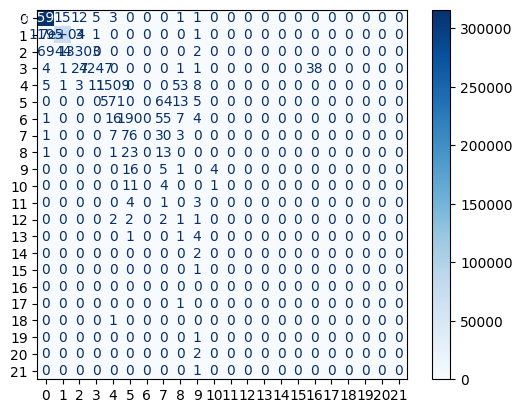

In [ ]:
# Crear y entrenar el modelo de regresión logística
logistic_model_1 = LogisticRegression(random_state=42)
logistic_model_1.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_logistic_1 = logistic_model_1.predict(X_test)

# Calcular métricas y matriz de confusión
accuracy_logistic_1 = accuracy_score(y_test, y_pred_logistic_1)
classification_rep_logistic_1 = classification_report(y_test, y_pred_logistic_1)
confusion_matrix_data_logistic_1 = confusion_matrix(y_test, y_pred_logistic_1)

# Mostrar resultados
print("Métricas del Modelo de Regresión Logística:")
print(classification_rep_logistic_1)
print('Accuracy Score: {}'.format(round(accuracy_logistic_1, 4)))

# Visualizar la matriz de confusión
display_logistic_1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data_logistic_1, display_labels=logistic_model_1.classes_)
display_logistic_1.plot(cmap='Blues')
plt.title("Matriz de Confusión del Modelo de Regresión Logística")
plt.show()


1. **Precision:**
   - Las precisiones varían para cada clase. Las clases '1', '2', '3' y '4' tienen precisiones razonablemente buenas, superando el 70%. Sin embargo, la clase '5' tiene una precisión de 0.00, lo que sugiere que el modelo no ha identificado correctamente ninguna instancia positiva para esa clase. Esto podría deberse a un desbalance de clases o dificultades específicas en la identificación de la clase '5'.

2. **Recall:**
   - El recall también varía entre clases. Las clases '3' y '4' tienen recalls superiores al 80%, indicando que el modelo identifica bien la mayoría de las instancias positivas para esas clases. Sin embargo, el recall para la clase '5' es 0.00, lo que indica que el modelo no ha identificado correctamente ninguna instancia positiva para esa clase.

3. **F1-Score:**
   - El F1-score, que es la media armónica ponderada de precisión y recall, refleja un buen equilibrio entre precisión y recall para las clases '1', '2', '3' y '4'. Sin embargo, el F1-score para la clase '5' es 0.00, lo que destaca las dificultades del modelo para manejar esa clase.

4. **Accuracy:**
   - La precisión global del modelo, medida por la accuracy, es del 79.2%. Es importante tener en cuenta que, dado el desbalance de clases y la dificultad para identificar la clase '5', la accuracy puede no ser la única métrica para evaluar el rendimiento del modelo.

En resumen, el modelo parece funcionar bastante bien para las clases '1', '2', '3' y '4', pero tiene dificultades para identificar instancias de la clase '5'.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Métricas del Modelo de Regresión Logística:
              precision    recall  f1-score   support

           1       0.96      1.00      0.98    913792
           2       0.95      0.69      0.80    124306
           3       0.00      0.00      0.00       586

    accuracy                           0.96   1038684
   macro avg       0.64      0.56      0.59   1038684
weighted avg       0.96      0.96      0.95   1038684

Accuracy Score: 0.958


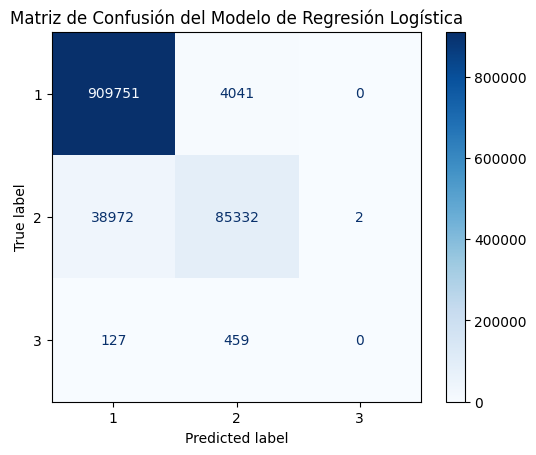

In [ ]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_2, y_train_2)

# Hacer predicciones en el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test_2)

# Calcular métricas y matriz de confusión
accuracy_logistic = accuracy_score(y_test_2, y_pred_logistic)
classification_rep_logistic = classification_report(y_test_2, y_pred_logistic)
confusion_matrix_data_logistic = confusion_matrix(y_test_2, y_pred_logistic)

# Mostrar resultados
print("Métricas del Modelo de Regresión Logística:")
print(classification_rep_logistic)
print('Accuracy Score: {}'.format(round(accuracy_logistic, 4)))

# Visualizar la matriz de confusión
display_logistic = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data_logistic, display_labels=logistic_model.classes_)
display_logistic.plot(cmap='Blues')
plt.title("Matriz de Confusión del Modelo de Regresión Logística")
plt.show()


**Clases:**
- Unspecified: 1
- Injured: 2
- Killed: 3

1. **Precision:**
   - La precisión mide la proporción de instancias clasificadas positivamente que son realmente positivas. En este caso, la precisión para la clase '1' es alta (0.96), lo que indica que la mayoría de las instancias clasificadas como '1' son verdaderamente '1'. Sin embargo, la precisión para la clase '2' es un poco menor (0.95), y es muy baja para la clase '3' (0.00). Esto sugiere que el modelo puede tener dificultades para identificar correctamente la clase '3'.

2. **Recall:**
   - Recall (o sensibilidad) mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo. El recall para la clase '1' es alto (1.00), lo que significa que el modelo identifica casi todas las instancias verdaderamente positivas de la clase '1'. Sin embargo, el recall para la clase '2' es más bajo (0.69), indicando que el modelo podría estar perdiendo algunas instancias positivas de la clase '2'. Además, el recall para la clase '3' es también bajo (0.00), lo que sugiere que el modelo no está identificando correctamente instancias de la clase '3'.

3. **F1-Score:**
   - El F1-score es la media armónica ponderada de precisión y recall. Para la clase '1', el F1-score es alto (0.98), indicando un buen equilibrio entre precisión y recall. Sin embargo, el F1-score es más bajo para la clase '2' (0.80) y es cero para la clase '3', lo que indica que el modelo tiene dificultades para realizar un equilibrio entre precisión y recall para estas clases.

4. **Accuracy:**
   - La precisión general del modelo, medida por la accuracy, es alta (0.96). Sin embargo, dado que el conjunto de datos puede tener clases desbalanceadas (como se refleja en el bajo recall para la clase '2' y '3'), la accuracy puede no ser la única métrica para evaluar el rendimiento del modelo.



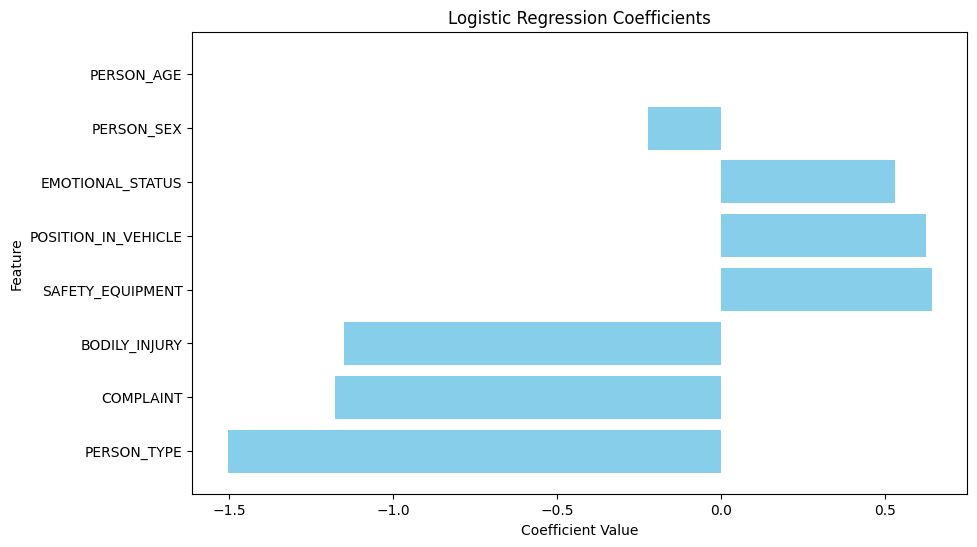

In [ ]:
# Obtener los coeficientes y los nombres de las características
coeficients = logistic_model.coef_[0]
feature_names = X_train_2.columns

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coeficients})

# Ordenar los coeficientes por valor absoluto
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

Métricas del Modelo de Regresión Logística:
              precision    recall  f1-score   support

           1       0.79      0.80      0.80    174569
           2       0.70      0.82      0.76    127136
           3       0.92      0.85      0.89    143827
           4       0.77      0.83      0.80    199518
           5       0.00      0.00      0.00     26425

    accuracy                           0.79    671475
   macro avg       0.64      0.66      0.65    671475
weighted avg       0.77      0.79      0.78    671475

Accuracy Score: 0.792


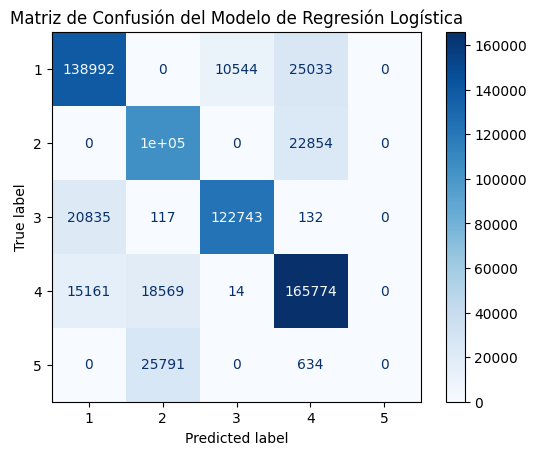

In [ ]:
columns_delete = ['ARREST_DATE', 'ARREST_BORO']
X_3 = dfa.drop(columns_delete, axis=1)
y_3 = dfa['ARREST_BORO']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_3, y_3, random_state=104, test_size=0.20, shuffle=True
)

# Crear y entrenar el modelo de regresión logística
logistic_model_2 = LogisticRegression(random_state=42)
logistic_model_2.fit(X_train_3, y_train_3)

# Hacer predicciones en el conjunto de prueba
y_pred_logistic_2 = logistic_model_2.predict(X_test)

# Calcular métricas y matriz de confusión
accuracy_logistic_2 = accuracy_score(y_test, y_pred_logistic_2)
classification_rep_logistic_2 = classification_report(y_test, y_pred_logistic_2)
confusion_matrix_data_logistic_2 = confusion_matrix(y_test, y_pred_logistic_2)

# Mostrar resultados
print("Métricas del Modelo de Regresión Logística:")
print(classification_rep_logistic_2)
print('Accuracy Score: {}'.format(round(accuracy_logistic_2, 4)))

# Visualizar la matriz de confusión
display_logistic_2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_data_logistic_2, display_labels=logistic_model_2.classes_)
display_logistic_2.plot(cmap='Blues')
plt.title("Matriz de Confusión del Modelo de Regresión Logística")
plt.show()


**Clases:**
- Bronx: 1
- Queens: 2
- Manhattan: 3
- Brooklyn: 4
- Staten Island: 5

1. **Precision:**
   - La precisión mide la proporción de instancias clasificadas positivamente que son realmente positivas. En este caso, la precisión varía entre las clases, siendo más alta para la clase '3' (0.92) y más baja para la clase '5' (0.00). La precisión de la clase '5' indica que el modelo tiene dificultades para identificar correctamente instancias de esa clase.

2. **Recall:**
   - Recall (o sensibilidad) mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo. El recall es más alto para la clase '3' (0.85) y más bajo para la clase '5' (0.00). Esto sugiere que el modelo tiene dificultades para identificar instancias positivas de la clase '5'.

3. **F1-Score:**
   - El F1-score es la media armónica ponderada de precisión y recall. El F1-score varía entre las clases, siendo más alto para la clase '3' (0.89) y más bajo para la clase '5' (0.00). Esto refleja las dificultades del modelo para equilibrar precisión y recall en la clase '5'.

4. **Accuracy:**
   - La precisión general del modelo, medida por la accuracy, es del 0.79. La accuracy indica qué tan bien el modelo predice correctamente todas las clases, pero puede verse afectada por el desbalance de clases, especialmente cuando hay una clase minoritaria (como la clase '5' en este caso).

En resumen, el modelo parece funcionar razonablemente bien para la mayoría de las clases, con un rendimiento particularmente fuerte para la clase '3'. Sin embargo, tiene dificultades para identificar instancias positivas de la clase '5', como se refleja en las métricas más bajas para esa clase.

##Técnicas de aprendizaje de máquina no supervisada

**La cuarta técnica que se va autilizar pertenece al grupo de aprendizaje de máquina no supervisado.**

Agrupamiento o Clustering:

4. _K-means_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


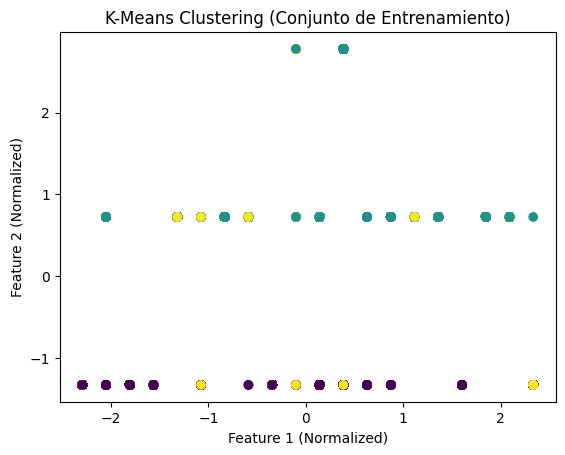

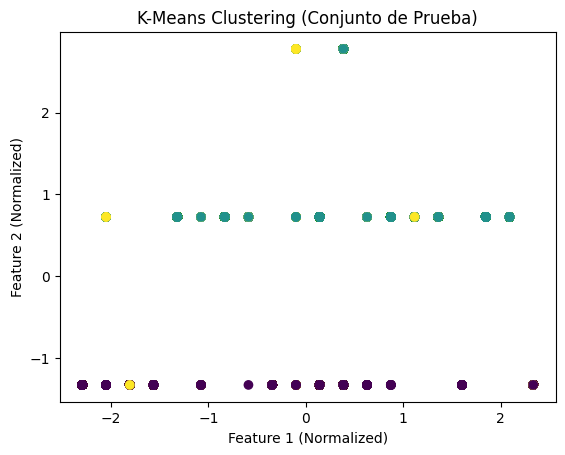

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Normalizar las características para que tengan media cero y varianza unitaria
scaler = StandardScaler()
X_train_3_normalized = scaler.fit_transform(X_train_3)
X_test_3_normalized = scaler.transform(X_test_3)

# Definir el número de clústeres
num_clusters = 3

# Aplicar K-Means al conjunto de entrenamiento
kmeans_train = KMeans(n_clusters=num_clusters, random_state=42)
y_kmeans_train = kmeans_train.fit_predict(X_train_3_normalized)

# Aplicar K-Means al conjunto de prueba (usando los centroides del conjunto de entrenamiento)
y_kmeans_test = kmeans_train.predict(X_test_3_normalized)

# Visualizar resultados en el conjunto de entrenamiento
plt.scatter(X_train_3_normalized[:, 0], X_train_3_normalized[:, 1], c=y_kmeans_train, cmap='viridis')
plt.title('K-Means Clustering (Conjunto de Entrenamiento)')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.show()

# Visualizar resultados en el conjunto de prueba
plt.scatter(X_test_3_normalized[:, 0], X_test_3_normalized[:, 1], c=y_kmeans_test, cmap='viridis')
plt.title('K-Means Clustering (Conjunto de Prueba)')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.show()


**Observaciones:**

- Se logra ver una gran distancia entre los puntos de una misma característica lo cual indica que no hay un buena integración entre los datos para lograr hacer agrupamientos.
- Ya que el _DataSet_ estaba separado en prueba y entrenamiento se dejo así a proposito, para ver si los datos que se habían dispuesto para entrenamiento y para prueba tienen congruencia entre ellos, y como se puede ver en los gráficos si loa tiene.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Eliminar columnas no deseadas si es necesario
columns_delete = ['ARREST_DATE']
# columns_to_keep = [...]  # Lista de columnas que deseas incluir
dfa2 = dfa.drop(columns_delete, axis=1)
# dfa = dfa[columns_to_keep]

# Normalizar los datos para que tengan media cero y varianza unitaria
scaler = StandardScaler()
dfa_normalized = scaler.fit_transform(dfa2)

# Definir el número de clústeres
n_clusters = 5

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
dfa2['cluster'] = kmeans.fit_predict(dfa_normalized)

# Visualizar la asignación de clústeres
print(dfa2['cluster'].value_counts())

# Puedes explorar más detalles sobre los centroides y otras métricas si es necesario
print(kmeans.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    1195941
4     959743
1     542371
3     382787
2     276531
Name: cluster, dtype: int64
[[ 7.18973080e-03 -1.00361778e-01  5.83843211e-01  7.99560446e-01
  -2.91205976e-01  3.46134529e-04 -4.78333787e-01 -2.50987403e-01]
 [-3.84330873e-02  1.09570078e-01  1.50037648e-02  2.72683108e-02
  -2.87339422e-01  9.28785302e-03  2.09059035e+00 -1.56314955e-01]
 [-2.51972546e-01  2.18723524e-01 -8.11593827e-04 -3.97536040e-01
   3.20351028e+00  5.78756426e-02 -1.06469211e-02 -1.73519140e-01]
 [-1.20333615e-02 -9.54217688e-03 -2.84170012e-01 -2.02239771e-02
  -2.82568590e-01  1.39684494e-02 -2.60644053e-01  2.16888973e+00]
 [ 9.01583416e-02  3.93628127e-03 -6.22534613e-01 -8.89231286e-01
  -2.85071775e-01 -2.79254800e-02 -4.78333787e-01 -4.13682390e-01]]
